# 차원축소와 매니폴드 학습
## LAB 11-1 3차원 공간의 데이터에서 주성분을 찾아보자
***
실습목표: 3차원 공간에 두 축을 가지는 2차원 부분 공간에 약간의 잡음을 더한 데이터를 생성하자. 이 데이터에 주성분 분석을 한 뒤 찾은 주성분이 잡음을 생성한 축과 일치하는지 확인해 보자.
***

In [1]:
# 넘파이와 맷플롯립을 사용할 수 있도록 준비
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 2차원 부분공간에 약간의 잡음을 더해 생성
u = np.array([1,1,1]) / np.sqrt(3)
v = np.array([1,0,-1]) / np.sqrt(2)

# 1000개의 데이터 셋 생성
n_data = 1000
X = []
for _ in range(n_data):
    r_coeff = np.random.randn(2,)
    # 잡음 더하기
    data = 2.0 * r_coeff[0] * u + r_coeff[1] * v + 0.1 * np.random.rand(3,)
    X.append(data)
    
X = np.array(X)  

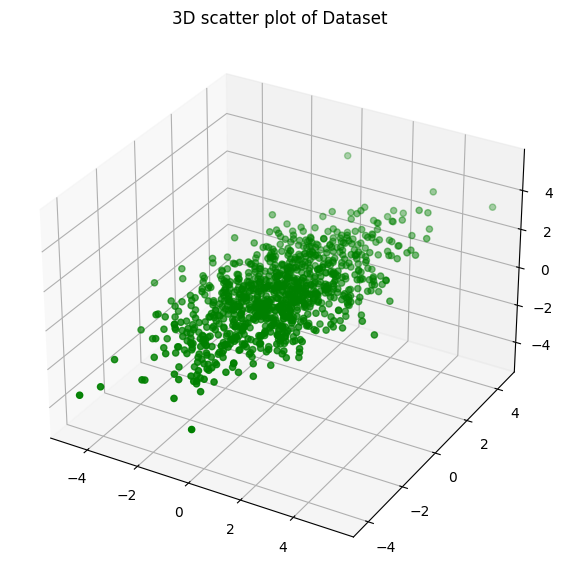

In [4]:
# 가시화를 위한 맷플롯립 figure 만들기
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection = "3d")

# 3차원 공간에 데이터 가시화
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = "green")
plt.title("3D scatter plot of Dataset")
plt.show()